In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4+3*X +np.random.randn(100,1)

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.1107931 ],
       [2.84137771]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)


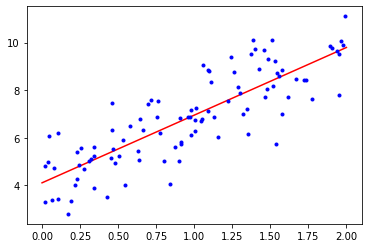

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

### SGD with learning schedule

In [18]:
n_epochs = 50
t0, t1 = 5,50
m= 100
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range (m):
        random_index = np.random.randint(m)
        xi =  X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*2 +i)
        theta = theta - eta*gradients

### SGD Linear Regression

In [41]:
from sklearn.linear_model import SGDRegressor, LinearRegression
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [42]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.28204237]), array([1.2207869]))

### Polynomial Regression

In [57]:
m = 100
X = 6* np.random.rand(m,1)-3
y = 0.5*X**2 +X+2+np.random.randn(m,1)

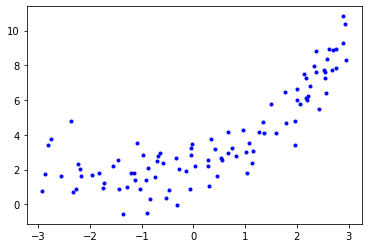

In [58]:
plt.plot(X,y,"b.")

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures (degree =2, include_bias= False)
X_poly = poly_features.fit_transform(X)


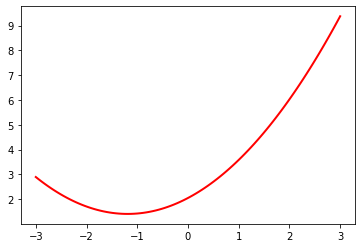

In [82]:
lin_reg =LinearRegression()
lin_reg.fit(X_poly,y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth= 2, label = "train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth= 3, label = "val")


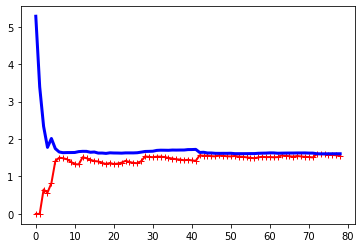

In [94]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

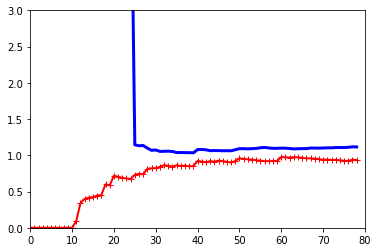

In [101]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline ([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias =False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### Regularized Linear Models

#### Ridge Regression
* l2 regularization

In [105]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.29313964]])

In [106]:
sgd_reg = SGDRegressor (penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.27952728])

#### Lasso Regression
* l1 regularization

In [110]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.25945018])

In [111]:
lasso_reg_2 = SGDRegressor(penalty = 'l1')
lasso_reg_2.fit(X,y.ravel())
lasso_reg_2.predict([[1.5]])

array([5.27124267])

### Elastic Net

In [113]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.25465172])

### Early Stopping